In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Дискретное распределение

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [7]:
sample = np.random.choice([1,2,3,4,5,6], 100)
print(sample)

[3 4 1 6 5 5 5 1 2 6 2 4 4 4 3 3 2 2 1 4 5 3 1 2 6 6 4 4 4 3 5 2 1 1 4 1 2
 5 4 5 1 3 2 2 3 2 6 6 4 4 1 4 2 1 2 1 6 4 5 3 1 4 2 2 3 5 1 3 6 1 2 6 4 2
 4 5 5 1 6 1 1 3 4 5 4 6 6 6 1 5 5 5 2 6 3 5 2 1 2 4]


Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [8]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({4: 20, 1: 19, 2: 19, 5: 16, 6: 14, 3: 12})
Вероятности выпадений каждой из сторон:
{3: 0.12, 4: 0.2, 1: 0.19, 6: 0.14, 5: 0.16, 2: 0.19}


Это и есть оценка функции вероятности дискретного распределения.

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [16]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
print(sample)

[ 1.02986724e-01 -1.00636787e+00 -1.46219168e-01  3.13036608e-01
 -8.53640027e-01  6.81978055e-01  9.08293663e-02  1.54868463e+00
 -2.63147551e-01 -1.34822954e+00 -1.16776002e+00  7.93368377e-01
 -1.00300885e+00 -4.60362668e-01 -1.88081922e+00  8.52035533e-01
 -3.28262123e-01 -1.23391463e-01 -1.29801711e+00  4.46310245e-01
 -3.48541398e-01 -8.62223642e-02  8.25558315e-01  2.58466177e-01
 -8.95434480e-01  4.17862357e-01  7.27261246e-04  7.10184315e-01
  3.70185754e-01 -7.64577705e-01  8.16851536e-01  1.81239965e+00
  1.16784907e+00  2.59431940e-02  7.60413650e-01  2.74667306e-01
  2.67135775e+00  1.42292046e-01  1.70463078e+00  1.19987904e+00
 -7.39493298e-01  8.67047483e-02  4.76705590e-01  1.15583000e-01
  8.39568326e-01  4.92692950e-01  2.90173381e-01  7.49850175e-01
 -6.70349163e-01  3.59094297e-01 -5.83975648e-01  4.76825163e-01
  9.60461507e-01  1.34463171e-01 -3.35558150e-01 -7.00353553e-02
  1.00602484e+00 -2.04676811e+00  3.63338892e-01 -3.63715348e-01
  1.10189873e+00 -1.95233

Эмпирическая функция распределения для полученной выборки:

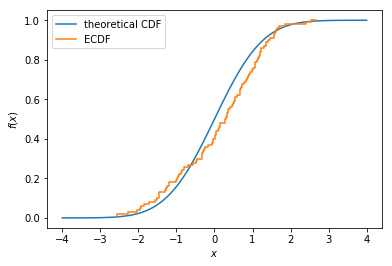

In [11]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Гистограмма выборки:

Text(0.5, 0, '$x$')

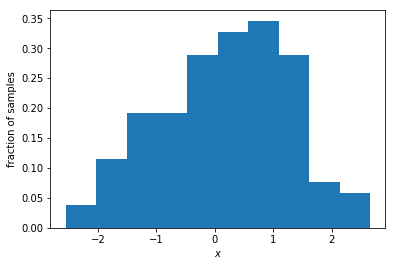

In [13]:
plt.hist(sample, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

Text(0.5, 0, '$x$')

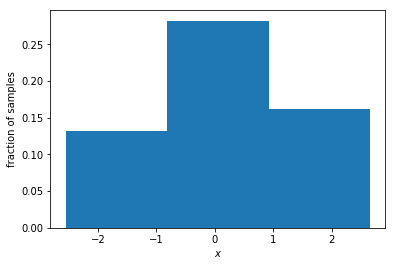

In [14]:
plt.hist(sample, bins=3, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

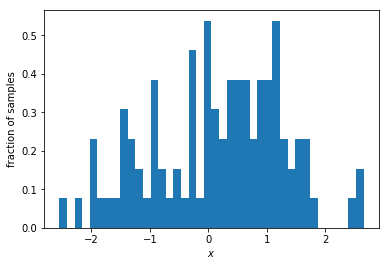

In [15]:
plt.hist(sample, bins=40, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

Text(0.5, 0, '$x$')

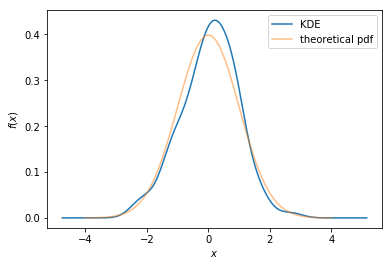

In [19]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')